In [1]:
# import the necessary libraries
import json
import pandas as pd   # ultimate dataframe library
import numpy as np    # scientific computing package
import seaborn as sns # visualization
import matplotlib.pyplot as plt
import requests
%matplotlib inline    
import warnings
warnings.filterwarnings('ignore')

import scipy.stats
from scipy.stats import t

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/JD-DataScienceProjects/Careerera_Projects/main/ANXIETY.csv")

In [3]:
df.shape

(103, 4)

In [4]:
df.head()

,Instructor,Final,Anxiety,Gender
0,A,35,93.552,Female
1,A,70,95.164,Male
2,A,70,83.880,Female
3,A,30,84.686,Male
4,A,92,82.268,Male


In [5]:
df.describe()

,Final,Anxiety
count,103.000000,103.000000
mean,59.757282,74.343670
std,23.185300,17.181858
min,10.000000,0.056000
25%,40.000000,69.775000
50%,65.000000,79.044000
75%,80.000000,84.686000
max,100.000000,97.582000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Instructor  103 non-null    object 
 1   Final       103 non-null    int64  
 2   Anxiety     103 non-null    float64
 3   Gender      103 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.3+ KB


In [7]:
df.isnull().sum()

Instructor    0
Final         0
Anxiety       0
Gender        0
dtype: int64

In [8]:
#make sure max and min are 0-100
df.describe()

,Final,Anxiety
count,103.000000,103.000000
mean,59.757282,74.343670
std,23.185300,17.181858
min,10.000000,0.056000
25%,40.000000,69.775000
50%,65.000000,79.044000
75%,80.000000,84.686000
max,100.000000,97.582000


In [9]:
df[df.duplicated()]

,Instructor,Final,Anxiety,Gender
53,B,20,81.462,Female


In [10]:
df.drop(53, inplace = True, axis = 0)

In [11]:
group_gender = df.groupby(['Gender'])
result_gender = group_gender[['Final', 'Anxiety']].mean()

In [12]:
result_gender

,Final,Anxiety
Gender,,
Female,58.640000,74.159640
Male,61.596154,74.383731


In [13]:
group_gender = df.groupby(['Gender'])
result_gender = group_gender[['Final', 'Anxiety']].median()

In [14]:
result_gender

,Final,Anxiety
Gender,,
Female,60.0,78.238
Male,65.0,79.044


In [15]:
df_Female = df[df['Gender'] == 'Female'].max()

In [16]:
df_Female

Instructor         D
Final            100
Anxiety        95.97
Gender        Female
dtype: object

In [17]:
df_Male = df[df['Gender'] == 'Male'].max()

In [18]:
df_Male

Instructor         D
Final            100
Anxiety       97.582
Gender          Male
dtype: object

In [19]:
df[df['Gender'] == 'Female'].describe()

,Final,Anxiety
count,50.000000,50.000000
mean,58.640000,74.159640
std,23.775103,18.242357
min,10.000000,0.056000
25%,46.250000,71.185500
50%,60.000000,78.238000
75%,75.000000,84.686000
max,100.000000,95.970000


In [20]:
df[df['Gender'] == 'Male'].describe()

,Final,Anxiety
count,52.000000,52.000000
mean,61.596154,74.383731
std,22.279208,16.421659
min,10.000000,10.000000
25%,40.000000,68.969000
50%,65.000000,79.044000
75%,80.000000,84.686000
max,100.000000,97.582000


In [21]:
group_instructor = df.groupby(['Instructor', 'Gender'])
result_instructor = group_instructor[['Final', 'Anxiety']].mean()

In [22]:
result_instructor

Final    Anxiety
Instructor Gender                      
A          Female  47.785714  85.261714
           Male    56.263158  81.264211
B          Female  53.857143  78.410714
           Male    62.052632  77.177474
C          Female  62.666667  74.409500
           Male    63.750000  68.868250
D          Female  75.700000  52.365400
           Male    74.166667  51.102667

In [23]:
freq_table = pd.crosstab(df['Instructor'], df['Gender'])

In [24]:
freq_table

Gender,Female,Male
Instructor,,
A,14,19
B,14,19
C,12,8
D,10,6


In [25]:
#check for outliers

# formula for IQR

q1 = df['Anxiety'].quantile(0.25)
q3 =df['Anxiety'].quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 1.5*iqr
upper_bound = q3 - 1.5*iqr

#identify outliers
outliers = df[(df['Anxiety'] < lower_bound) | (df['Anxiety'] > upper_bound)]

outliers

,Instructor,Final,Anxiety,Gender
0,A,35,93.552,Female
1,A,70,95.164,Male
2,A,70,83.880,Female
3,A,30,84.686,Male
4,A,92,82.268,Male
...,...,...,...,...
98,D,100,20.206,Female
99,D,75,27.460,Female
100,D,85,37.132,Male
101,D,90,0.056,Female


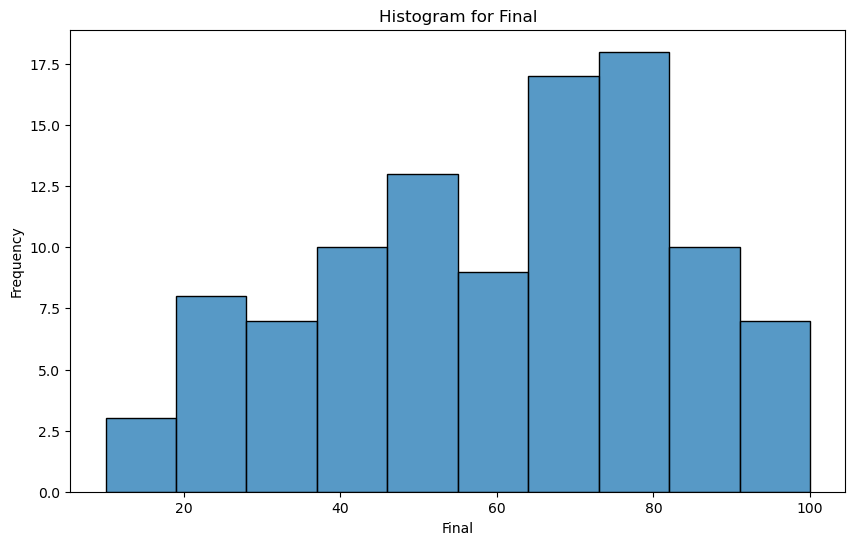

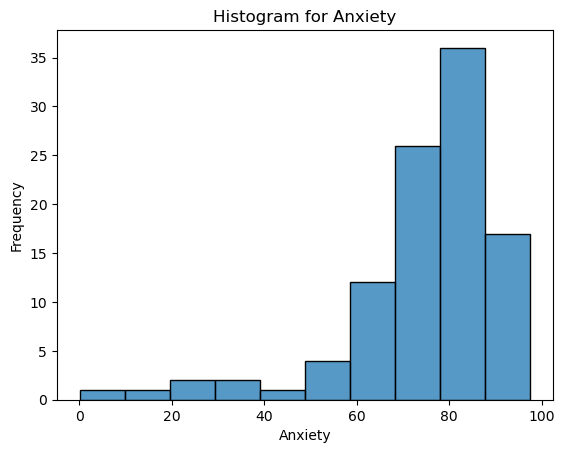

In [26]:
# Set figure size
plt.figure(figsize=(10, 6))

# Create histogram for each numeric variable
for column in df.select_dtypes(include=['int', 'float']):
    sns.histplot(df[column], kde=False, bins=10)  # Adjust bins as needed
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [27]:
# Higher anxiety levels occur more frequently. Might be some outliers.
# The final scores are left-skewed.

Text(0.5, 0, 'Scores from 0 - 100')

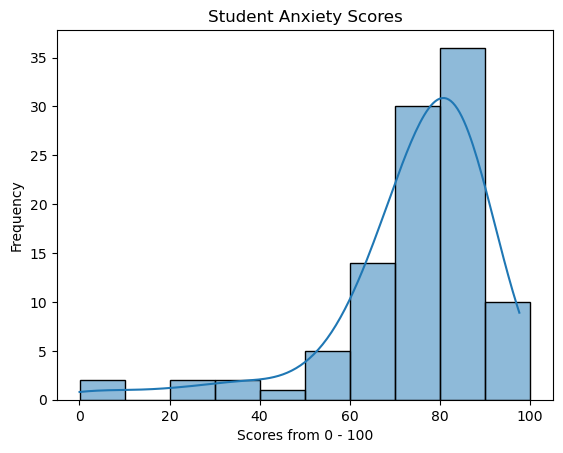

In [28]:
# create a histogram
ax = sns.histplot(data = df, x = 'Anxiety', binwidth = 10, kde = True)
ax.set_title("Student Anxiety Scores")
ax.set_ylabel("Frequency")
ax.set_xlabel("Scores from 0 - 100")

In [29]:
# This histogram shows that Anxiety does indeed have outliers.
# The Density curve shows that Anxiety is left-skewed.

Text(0.5, 0, 'Scores from 0 - 100')

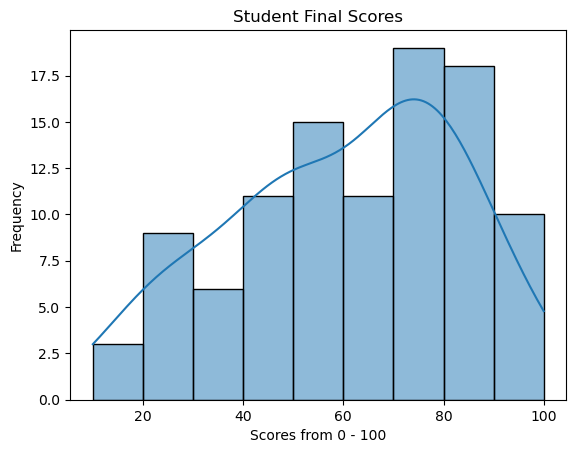

In [30]:
#specify the number of bins
# create a histogram
ax = sns.histplot(data = df, x = 'Final', binwidth = 10, kde = True)
ax.set_title("Student Final Scores")
ax.set_ylabel("Frequency")
ax.set_xlabel("Scores from 0 - 100")

In [31]:
# Final is also left-skewed, but has a lot more missing area between the curve.

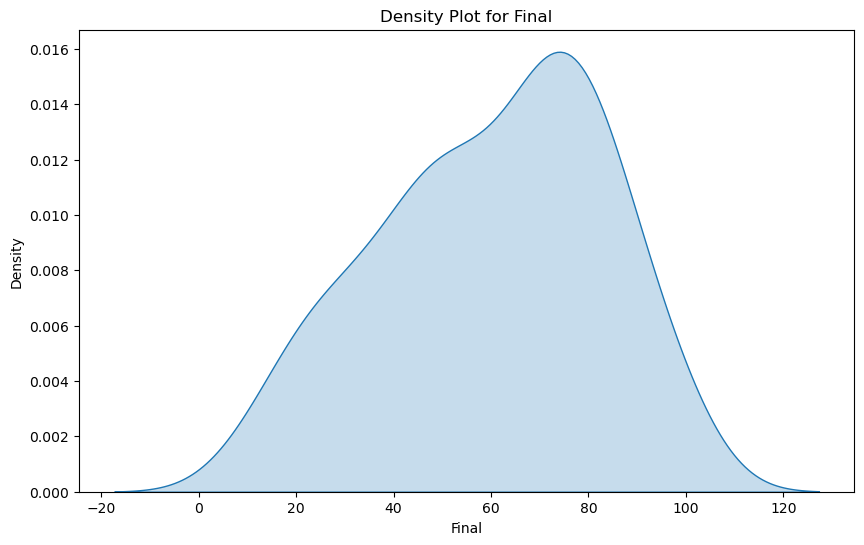

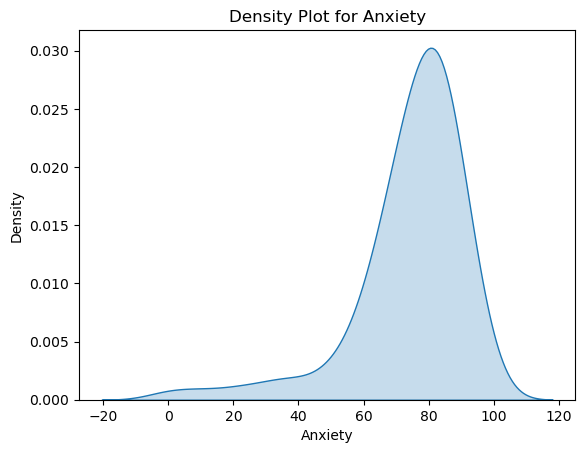

In [32]:
# Set figure size
plt.figure(figsize=(10, 6))

# Create density plot for each numeric variable
for column in df.select_dtypes(include=['int', 'float']):
    sns.kdeplot(df[column], shade=True)
    plt.title(f'Density Plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()

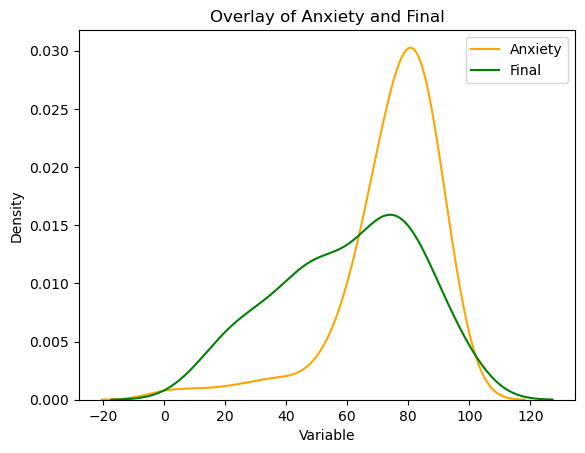

In [33]:
# Plot the first part
sns.kdeplot(df['Anxiety'], color = 'orange', label='Anxiety')

# Overlay the second part
sns.kdeplot(df['Final'], color = 'green', label='Final')

# Add labels and legend
plt.title('Overlay of Anxiety and Final')
plt.xlabel('Variable')
plt.ylabel('Density')
plt.legend()

plt.show()

In [34]:
# DENSITY PLOT NOTES (cont) :
# In this graph, it is clear that Final has more normal distribution than Anxiety.
# More variables in the 70-80 range of anxiety (peak).

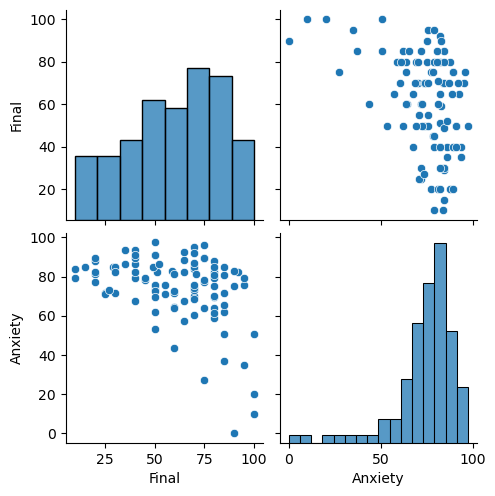

In [35]:
sns.pairplot(df)
plt.show()

In [36]:
# Higher anxiety levels are more frequent throughout all final scores.

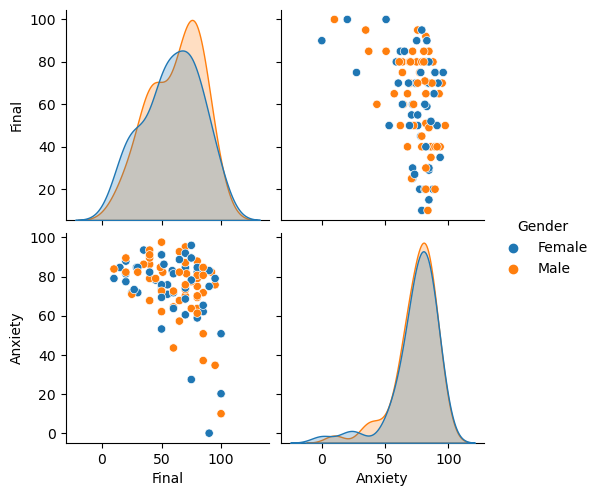

In [37]:
sns.pairplot(df, hue = 'Gender')

In [38]:
# PAIRPLOT NOTES: 
# Most of the data is greater than 50. Clusters of final and anxiety being 80.
# Female final has a more normal distribution compared to Male final.

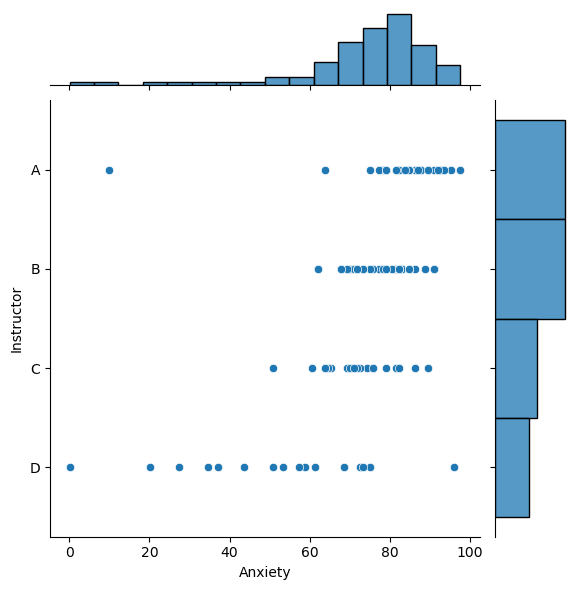

In [39]:
sns.jointplot(x = 'Anxiety', y = 'Instructor', data = df)

In [40]:
# Instructor A has an outlier with low Anxiety.
# Instructor D has the widest spread of anxiety.
# Note: D has a smaller data set compared to the other instructors.

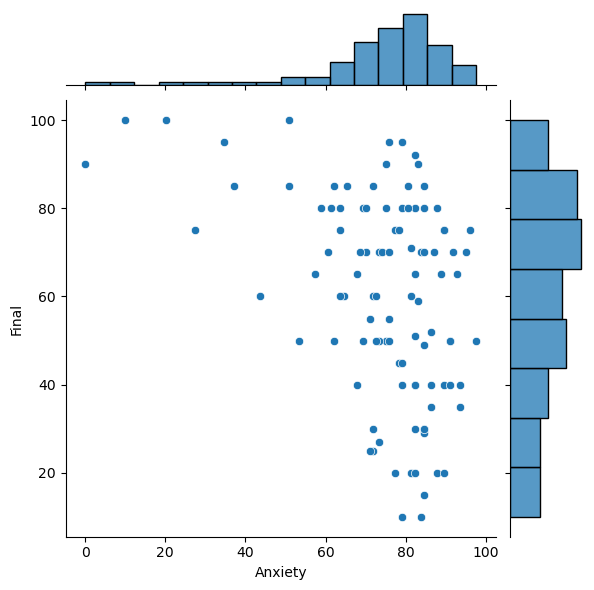

In [41]:
sns.jointplot(x = 'Anxiety', y = 'Final', data = df)

In [42]:
# Shows that there are possible outliers in Anxiety.

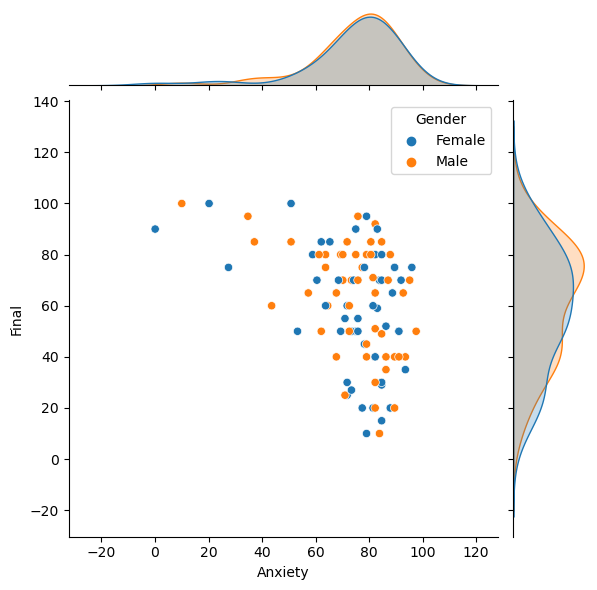

In [43]:
sns.jointplot(data = df, x = 'Anxiety', y = 'Final', hue = "Gender")

In [44]:
# The difference between male and female anxiety is not significant.
# Male Final has a cluster on 80 which makes the curve taller than Female.

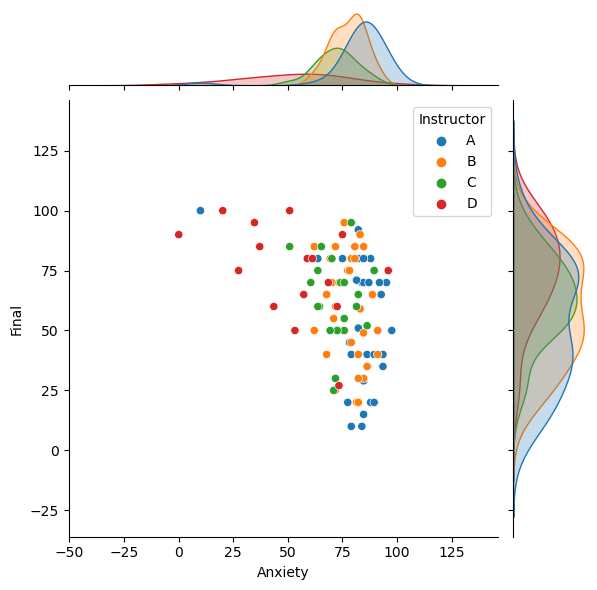

In [45]:
sns.jointplot(data = df, x = 'Anxiety', y = 'Final', hue = 'Instructor')

In [46]:
# Instructor D has a pretty normal distribution of anxiety levels, but it does not contain nearly as much data as the other instructors.
# All other instructors are left-skewed.
# Final for Instructor D is slightly right-skewed. Instructor C has the most normal distributed.
# Instructor A and B shows at least two modes for Final.

In [47]:
df[['Anxiety', 'Final']].corr()

,Anxiety,Final
Anxiety,1.000000,-0.412388
Final,-0.412388,1.000000


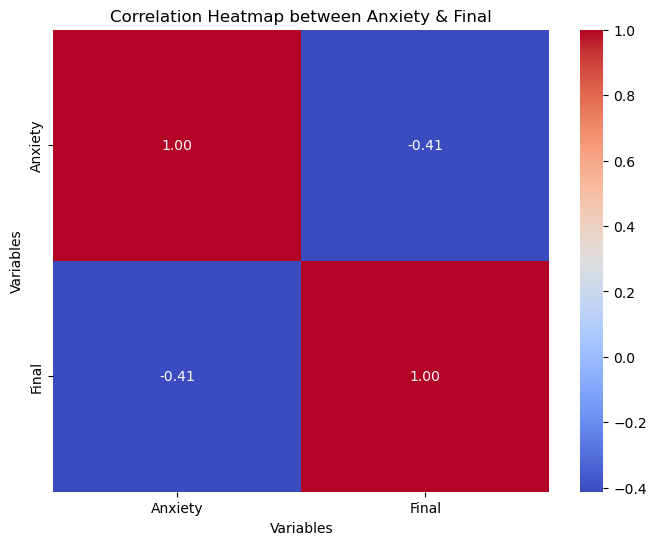

In [48]:
# calculate the correlation matrix
correlation_matrix = df[['Anxiety', 'Final']].corr()

#create the heatmap
plt.figure(figsize =(8,6))
heatmap = sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f')

#set title and labels
plt.title('Correlation Heatmap between Anxiety & Final')
plt.xlabel('Variables')
plt.ylabel('Variables')

plt.show()

In [49]:
# HEATMAP NOTES:
# The correlation shows that when anxiety increases, final decreases.
# Equally, when anxiety decreases, final increases.

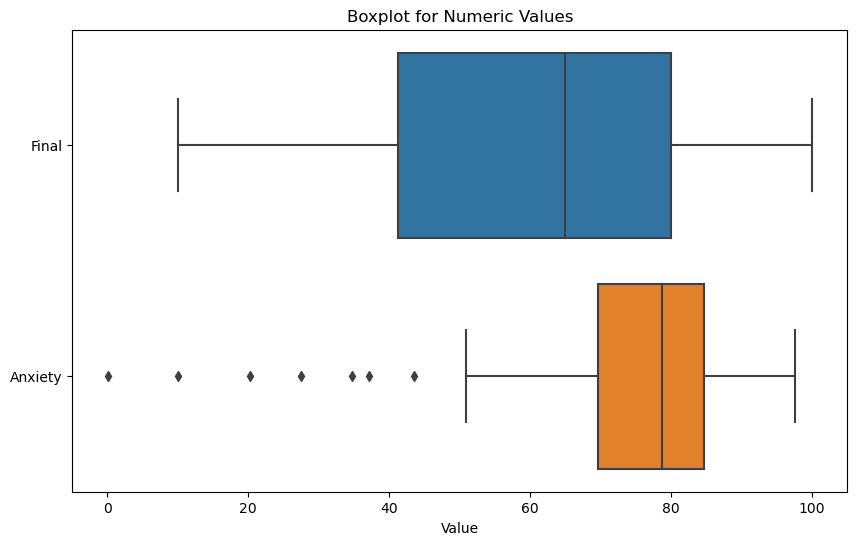

In [50]:
#set the figure size
plt.figure(figsize =(10,6))

#create boxplot for each numeric column
sns.boxplot(data=df, orient ='h')

#set title and labels
plt.title('Boxplot for Numeric Values')
plt.xlabel('Value')

plt.show()

In [51]:
#BOXPLOT NOTES:
# Anxiety has seven outliers.
# Final has no outliers.

Text(0.5, 1.0, 'Anxiety by Instructor')

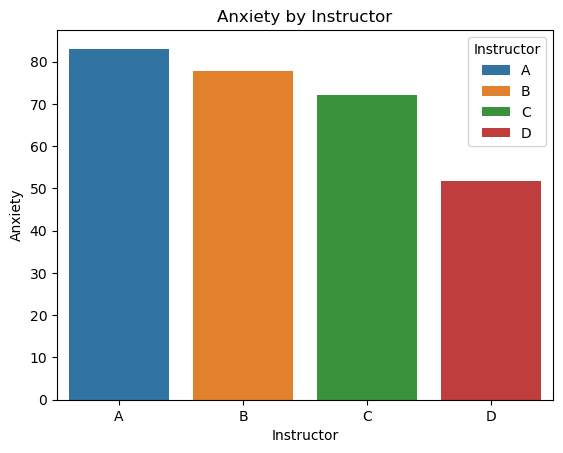

In [52]:
ax = sns.barplot(data= df, x = 'Instructor', y = 'Anxiety', hue = 'Instructor', ci = False, dodge = False)
ax.set_title('Anxiety by Instructor')

In [53]:
# Instructor A has the highest Anxiety
# Instructor D has the lowest

Text(0.5, 1.0, 'Sum Anxiety by Instructor')

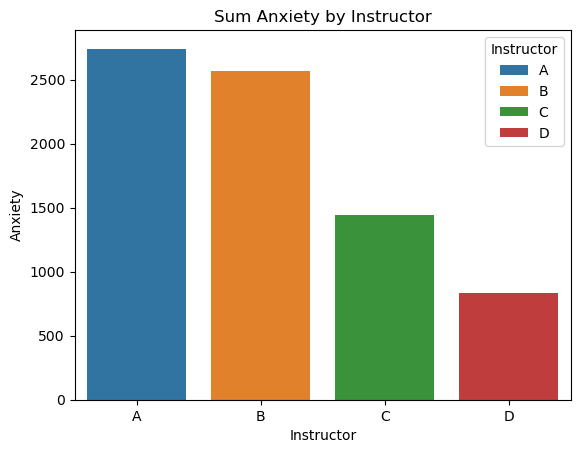

In [54]:
ax = sns.barplot(data = df, x = 'Instructor', y = 'Anxiety', hue = 'Instructor', ci = False, dodge = False, estimator = 'sum')
ax.set_title('Sum Anxiety by Instructor')

In [55]:
# Column Chart NOTES:
# This shows that Instructor A and Instructor B are very close to the same sum of Anxiety.

Text(0.5, 1.0, 'Final by Instructor')

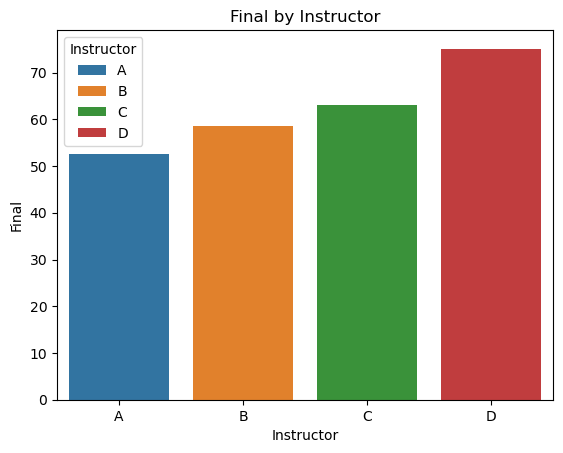

In [56]:
ax = sns.barplot(data = df, x = 'Instructor', y = 'Final', hue = 'Instructor', ci = False, dodge = False)
ax.set_title('Final by Instructor')

In [57]:
# D has higher Final scores

Text(0.5, 1.0, 'Median Final by Instructor')

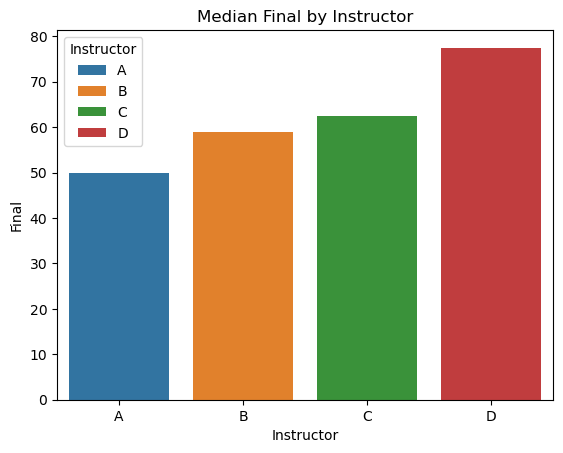

In [58]:
ax = sns.barplot(data = df, x = 'Instructor', y = 'Final', hue = 'Instructor', ci = False, dodge = False, estimator = 'median')
ax.set_title('Median Final by Instructor')

In [59]:
# This shows the median of the final scores, and instructor D has the highest.
# B and C have close median final scores.

Text(0.5, 1.0, 'Mean Final by Instructor')

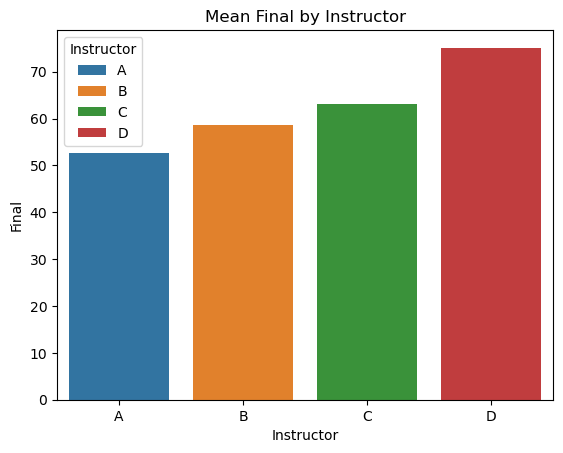

In [60]:
ax = sns.barplot(data = df, x = 'Instructor', y = 'Final', hue = 'Instructor', ci = False, dodge = False, estimator = 'mean')
ax.set_title('Mean Final by Instructor')

In [61]:
# Unlike the last chart, B and C are further apart now when calculated using the mean.

Text(0.5, 1.0, 'Anxiety by Instructor')

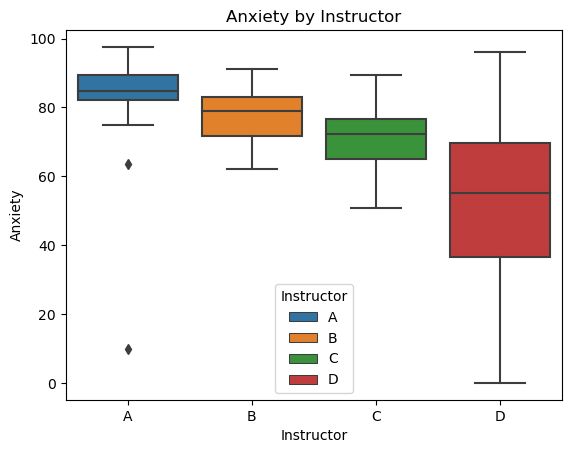

In [62]:
ax = sns.boxplot(data = df, x = 'Instructor', y = 'Anxiety', hue = 'Instructor', dodge = False)
ax.set_title('Anxiety by Instructor')

In [63]:
# In this boxplot, it is apparent that Instructor A actually has two outliers.
# D has a significantly larger range of Anxiety than the other instructors.

Text(0.5, 1.0, 'Final by Instructor')

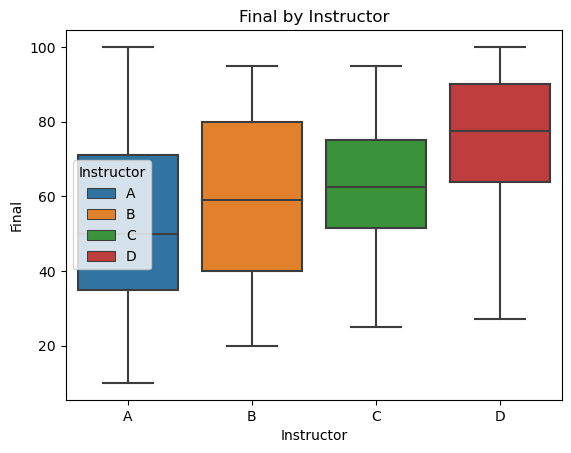

In [64]:
ax = sns.boxplot(data = df, x = 'Instructor', y = 'Final', hue = 'Instructor', dodge = False)
ax.set_title('Final by Instructor')

In [65]:
# Instructor A has the widest spread of Final scores than the other instructors.
# Instruct B and C are the closest related.

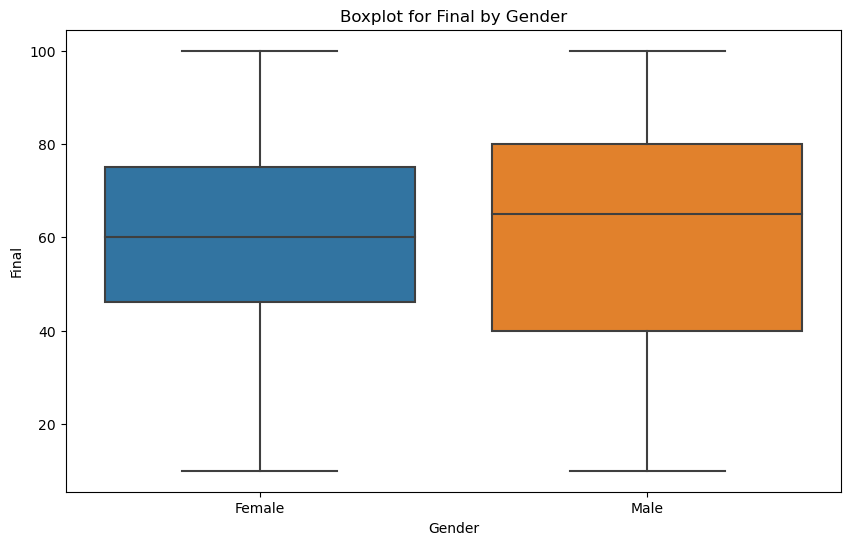

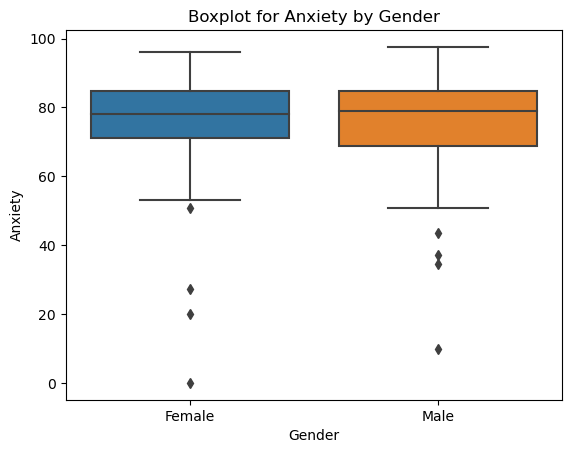

In [66]:
# Set figure size
plt.figure(figsize=(10, 6))

# Create boxplot for each category over each numeric variable
for numeric_column in df.select_dtypes(include=['int', 'float']):
    sns.boxplot(x='Gender', y=numeric_column, data=df)
    plt.title(f'Boxplot for {numeric_column} by Gender')
    plt.xlabel('Gender')
    plt.ylabel(numeric_column)
    plt.show()

In [67]:
# Male have a slightly larger range than Female for final when compared.
# Anxiety levels are similar, and both have outliers.

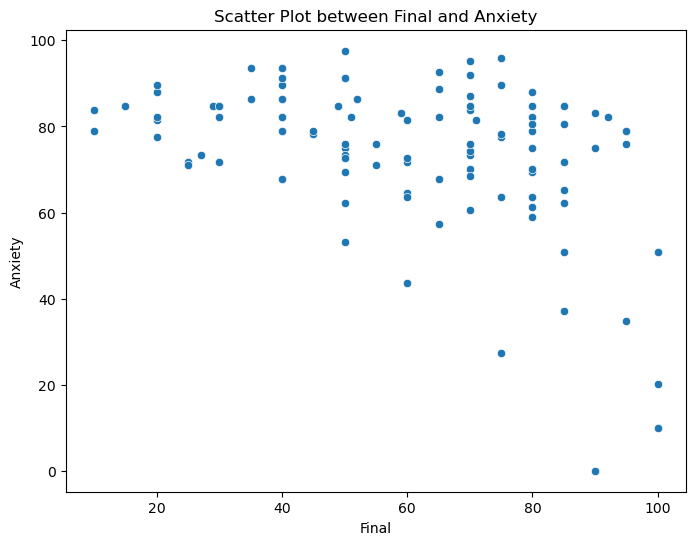

In [68]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Final', y='Anxiety', data=df)
plt.title('Scatter Plot between Final and Anxiety')
plt.xlabel('Final')
plt.ylabel('Anxiety')
plt.show()

In [69]:
# SCATTERPLOT NOTES:
# Cluster of final scores of 50 and Anxiety score of about 70.

In [70]:
# Summary:
# Variables: Instructor (categorical), Gender (categorical), Anxiety (numerical), Final (numerical)
# Hypotheses: 
    # 1. Hypothesize there is no significant difference between the anxiety level taught by different instructors.
        # H0: There is no significant difference in anxiety levels between students taught by different instructors.
        # H1: There is a significant difference.
    # 2. Hypothesize that there is no significant difference between final exam scores taught by different instructors.
        # H0: No significant difference between scores taught by different instructors.
        # H1: Signifcant difference between final exam scores taught by different instructors.
# Expected Outcomes:
    # 1. The anxiety and final scores are significantly different between instructors.
# Conclusion: 
    # The instructor makes a difference in anxiety and final scores. Gender does not seem to make a significant difference in anxiety and final.
# This information can assist educational practices aimed at students academic success.